# AQI computation for the year 2008

In [1]:
# importing required packages
import pandas as pd
import numpy as np
from datetime import datetime
from dateutil.parser import parse
import matplotlib.pyplot as plt

In [2]:
# loading the dataset
df = pd.read_excel(r'C:\Users\Admin\Desktop\PROJECT\FYP\Air-Quality-Index-Analysis\date_data.xlsx',parse_dates=['date'])
df.head()

,date,so2,no2,rspm,spm
0,2008-01-01,4.000000,36.500000,131.000000,388.000000
1,2008-01-02,4.948598,47.769626,249.912281,464.264151
2,2008-01-03,4.948598,47.769626,249.912281,464.264151
3,2008-01-04,4.000000,40.700000,164.000000,458.000000
4,2008-01-05,4.948598,47.769626,249.912281,464.264151


In [3]:
# extracting data for the year 2008
df_2008 = pd.DataFrame(df.iloc[0:366])

In [4]:
df_2008.tail()

,date,so2,no2,rspm,spm
361,2008-12-27,4.948598,47.769626,249.912281,464.264151
362,2008-12-28,4.948598,47.769626,249.912281,464.264151
363,2008-12-29,8.500000,57.300000,304.000000,539.000000
364,2008-12-30,4.948598,47.769626,249.912281,464.264151
365,2008-12-31,4.948598,47.769626,249.912281,464.264151


## Average AQI calculation for 2008

### STEP 1 : Calculating concentration (mean/median) for each pollutant

In [5]:
so2_mean = df_2008.so2.mean()
no2_mean = df_2008.no2.mean()
rspm_mean = df_2008.rspm.mean()
spm_mean = df_2008.spm.mean()

In [6]:
print(so2_mean)
print(no2_mean)
print(rspm_mean)
print(spm_mean)

4.9332771564271765
46.7095296460857
243.9665420381563
453.8675121146496


In [7]:
s = [50,40,60,40]
c = [so2_mean, no2_mean, spm_mean, rspm_mean]

### STEP 2 : Calculating the pollution index for each component

In [8]:
q = []
for i in range(0,4):
    z = s[i]*c[i]/100
    q.append(z)
print(q)

[2.4666385782135882, 18.68381185843428, 272.32050726878975, 97.58661681526252]


### STEP 3 : Determining the weight ratio for each pollutant

In [9]:
w = [5,43,133,201] #these values are taken as per the Indian standards
w_sum = 0
for i in range(0,len(w)):
    w_sum += w[i]
print(w_sum)

382


In [10]:
w_ratio = []
for i in range(len(w)):
    x = float(w[i])/float(w_sum)
    w_ratio.append(x)
print(w_ratio)

[0.013089005235602094, 0.112565445026178, 0.3481675392670157, 0.5261780104712042]


### STEP 4 : Evaluation of AQI

In [11]:
aqi = 0
for i in range(0,4):
    aqi += q[i]*0.25
print(aqi)

97.76439363017504


## Calculating AQI for each day in the year 2008

In [12]:
s = [50,40,60,40] 
list_aqi = []
C = []

for index,row in df_2008.iterrows():
    # concentration (mean/median) for each pollutant
    C = [ row['so2'], row['no2'], row['spm'], row['rspm'] ]
    
    # calculating pollution index
    q = []
    for i in range(0,4):
        z = s[i]*C[i]/100
        q.append(z)
    
    #AQI calculation
    aqi = 0
    for i in range(0,4):
        aqi += q[i]*w_ratio[i]
    
    list_aqi.append(aqi)
    
# loading the calculated AQI in the dataframe
df_2008['aqi'] = np.array(list_aqi)

In [13]:
df_2008.head()

,date,so2,no2,rspm,spm,aqi
0,2008-01-01,4.000000,36.500000,131.000000,388.000000,110.294764
1,2008-01-02,4.948598,47.769626,249.912281,464.264151,151.767633
2,2008-01-03,4.948598,47.769626,249.912281,464.264151,151.767633
3,2008-01-04,4.000000,40.700000,164.000000,458.000000,132.052461
4,2008-01-05,4.948598,47.769626,249.912281,464.264151,151.767633


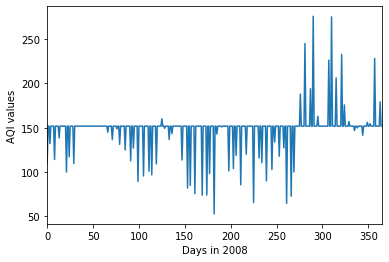

In [17]:
# plot of everyday AQI 
df_2008['aqi'].plot()
plt.xlabel('Days in 2008')
plt.ylabel('AQI values')
plt.show()

In [15]:
# exporting the calculated value to excel
df_2008.to_excel('aqi08_data.xlsx')